<a href="https://colab.research.google.com/github/gayatrikurhekar6/TED-talks-views-prediction/blob/main/Ted_talk_views_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/data_ted_talks.csv'
df=pd.read_csv(path)





In [ ]:
df.shape

(4005, 19)

In [ ]:
df.info

<bound method DataFrame.info of       talk_id                                             title  \
0           1                       Averting the climate crisis   
1          92                   The best stats you've ever seen   
2           7                                  Simplicity sells   
3          53                               Greening the ghetto   
4          66                       Do schools kill creativity?   
...       ...                                               ...   
4000    62678       Crisis support for the world, one text away   
4001    62782                      The dark history of IQ tests   
4002    62263  How "policing for profit" undermines your rights   
4003    62784      The electrifying speeches of Sojourner Truth   
4004    62794              The most important anus in the ocean   

                 speaker_1                 all_speakers  \
0                  Al Gore               {0: 'Al Gore'}   
1             Hans Rosling          {0: 'Hans

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
df=df.drop(columns=['url'])

In [ ]:
df2=df.nlargest(10, ['views'])
df2[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


In [ ]:
df['comments']

0        272.0
1        628.0
2        124.0
3        219.0
4       4931.0
         ...  
4000       6.0
4001       NaN
4002       9.0
4003       NaN
4004       NaN
Name: comments, Length: 4005, dtype: float64

<Axes: title={'center': "Speaker's of most popular video"}, xlabel='speaker_1', ylabel='views'>

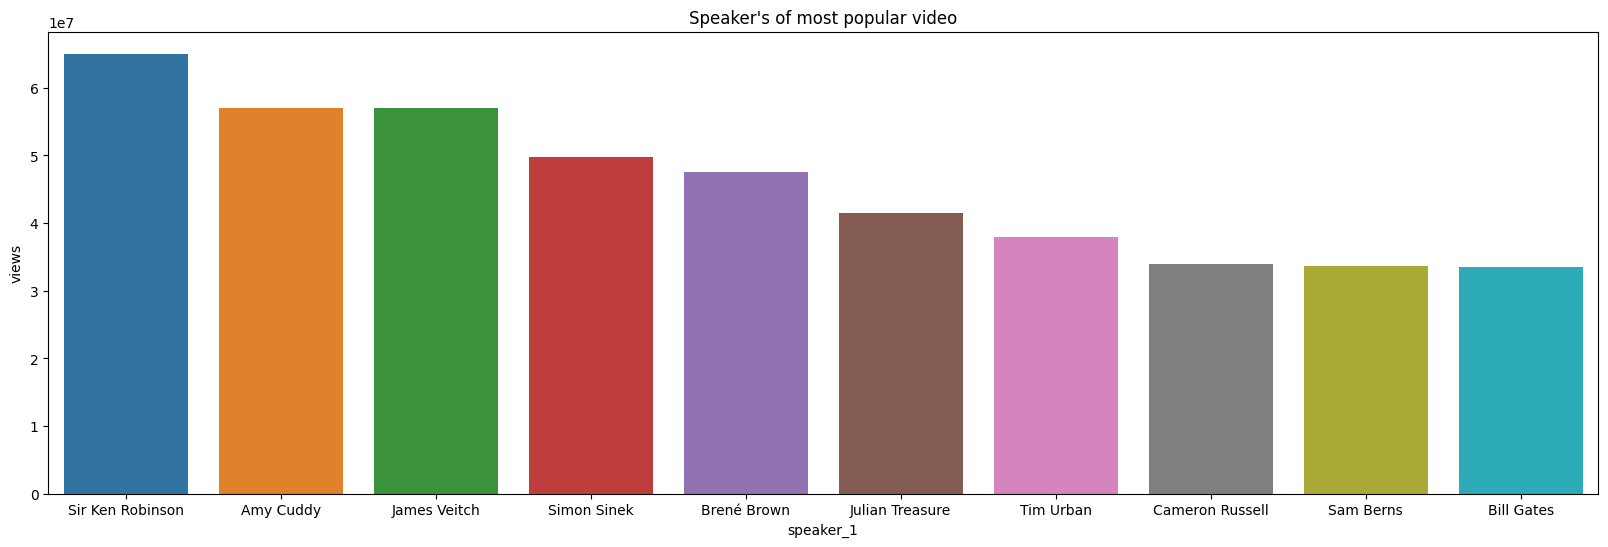

In [ ]:
#finding Speaker's of most popular video
plt.figure(figsize=(20,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=df2)

In [ ]:

#finding most popular speaker from the dataset
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


<Axes: title={'center': 'Most popular Speaker according to total views on their talks'}, xlabel='speaker_1', ylabel='views'>

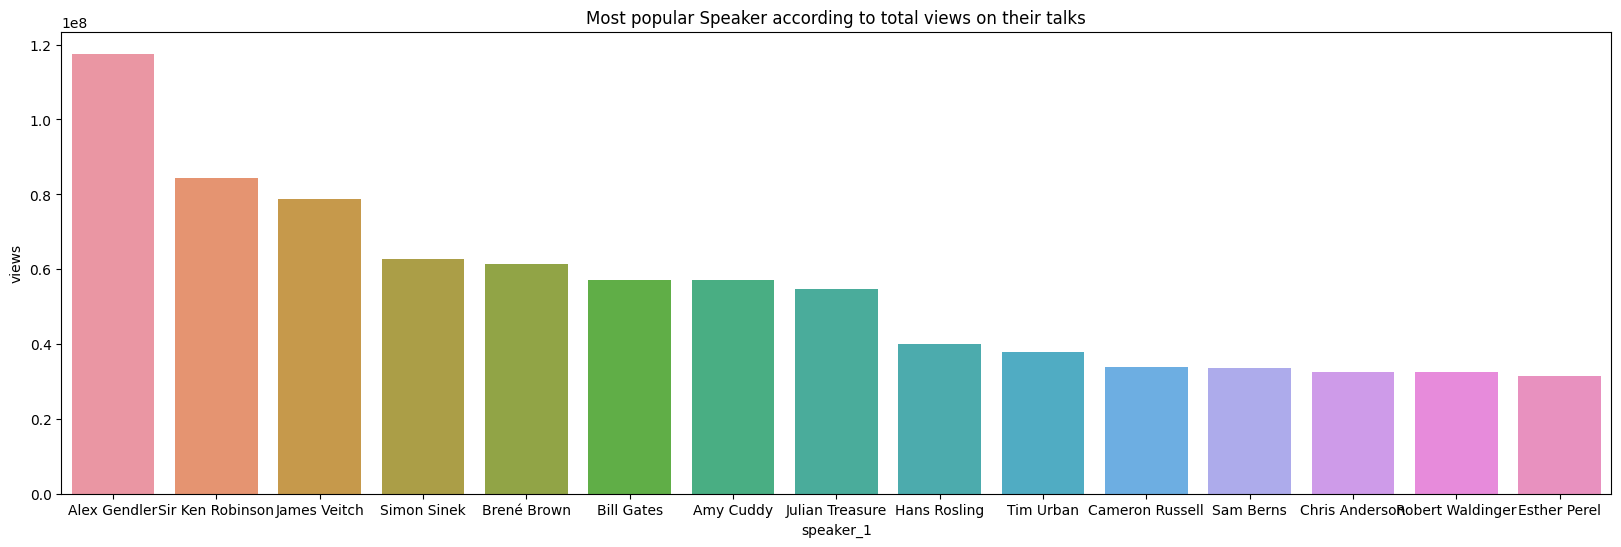

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

In [ ]:
pop_speaker_df['speaker_1'].value_counts().head(8)

Alex Gendler        1
Sir Ken Robinson    1
James Veitch        1
Simon Sinek         1
Brené Brown         1
Bill Gates          1
Amy Cuddy           1
Julian Treasure     1
Name: speaker_1, dtype: int64

In [ ]:

unique_values = df['event'].unique()
len('unique_values')

13

In [ ]:
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df


,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


In [ ]:

#let's find the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)

<Axes: title={'center': 'Top event category according to total views'}, xlabel='event', ylabel='views'>

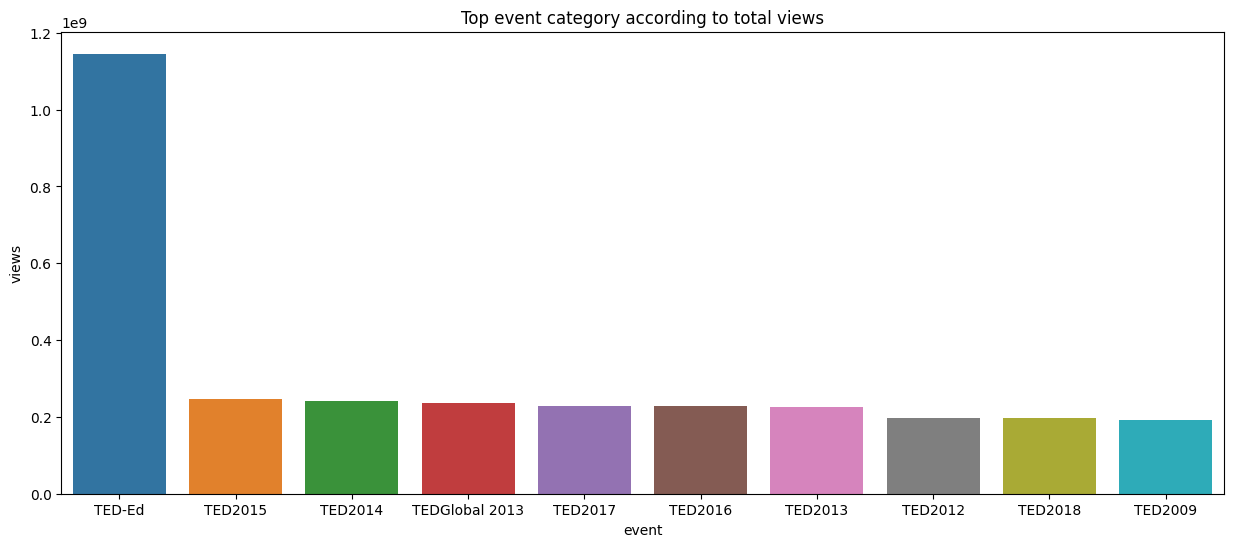

In [ ]:
#plotting the Top event category according to total views
plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

In [ ]:
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

In [ ]:

#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

There are 157160 words in the combination of all titles.


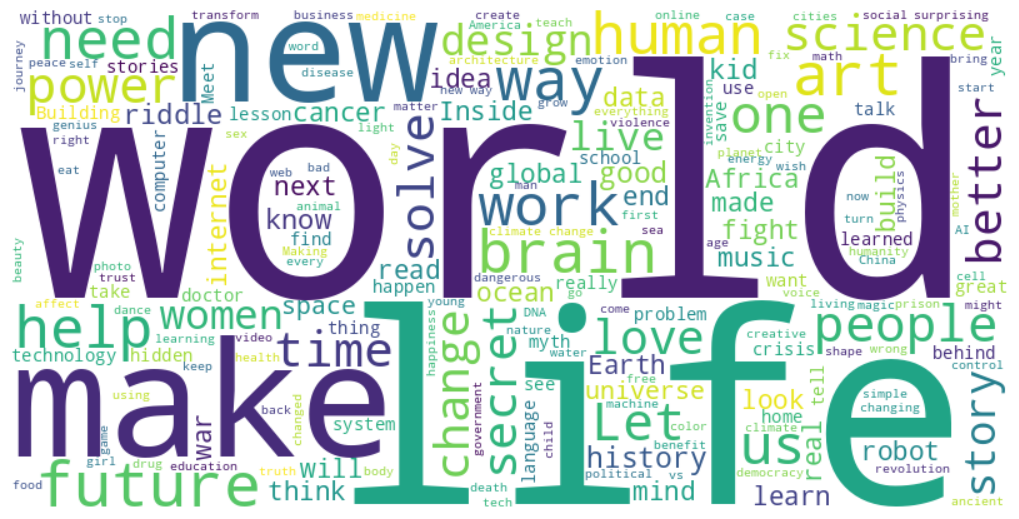

In [ ]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**frequent words are: World, life, power, make, new,human future,story, people, change**

There are 404126 words in the combination of all topics.


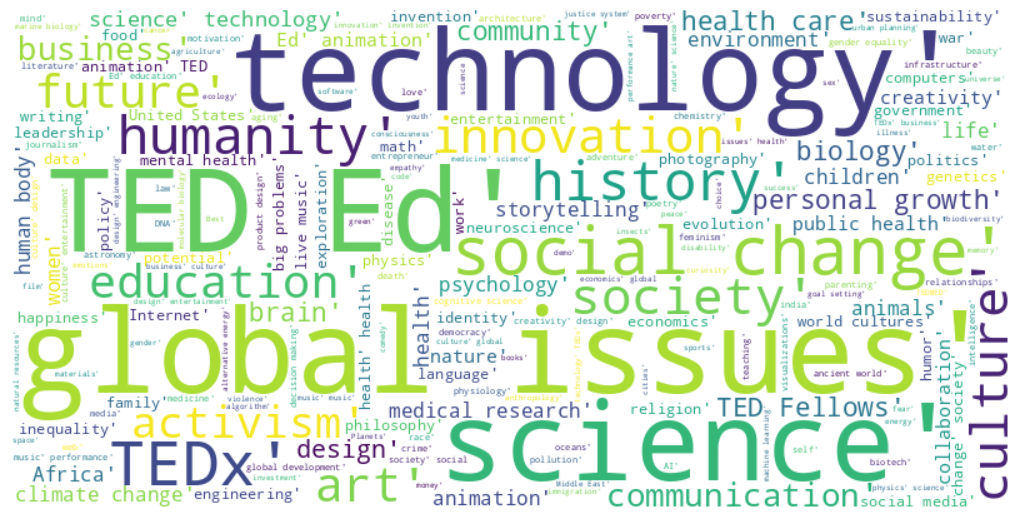

In [ ]:

from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
df['occupations'][0]

"{0: ['climate advocate']}"

In [ ]:
df['occupations'].isna().sum()

522

In [ ]:
#replacing Nan values of occupations column with other
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

In [ ]:
#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
df['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                     {0: 'Other'}
4002                          {0: ['law researcher']}
4003                                     {0: 'Other'}
4004                                     {0: 'Other'}
Name: occupations, Length: 4005, dtype: object

In [ ]:

#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)


In [ ]:
#Checking the length of unique occupation in event column.
len(df['occupation'].unique())


1552

In [ ]:
df['occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                       O
4002                          law researcher
4003                                       O
4004                                       O
Name: occupation, Length: 4005, dtype: object

[Text(0.5, 1.0, "top 15 most frequent speaker's occupations")]

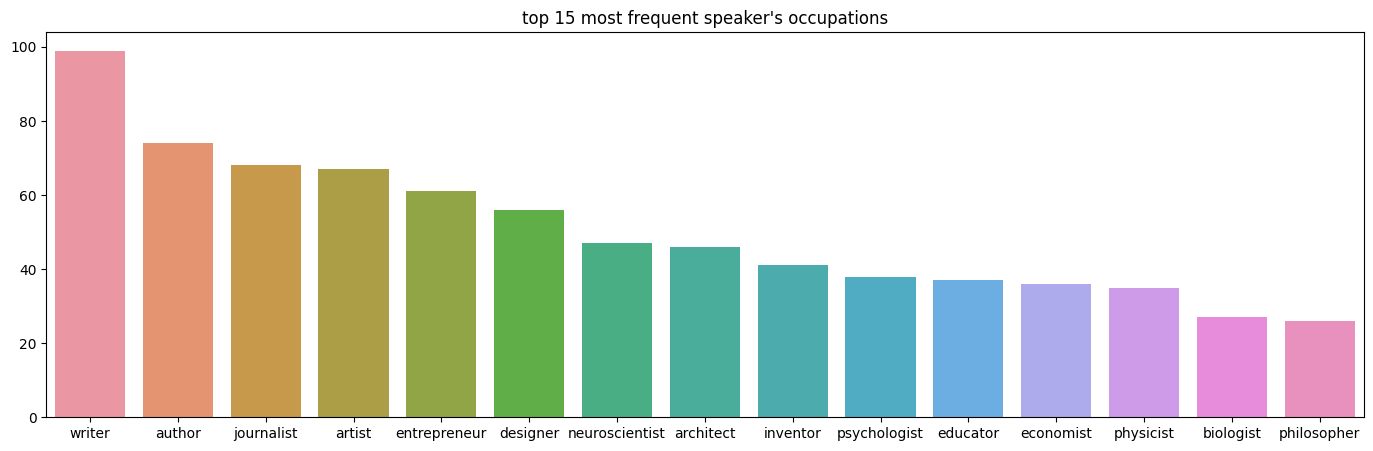

In [ ]:
#Printing the top 15 most frequent speaker's occupations
occ_df=df[df['occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_df['occupation'].value_counts(ascending=False).head(15).index,
              y=occ_df['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 most frequent speaker's occupations")

In [ ]:
#printing the value_counts of occupation column
occ_df['occupation'].value_counts().head(8)

writer            99
author            74
journalist        68
artist            67
entrepreneur      61
designer          56
neuroscientist    47
architect         46
Name: occupation, dtype: int64

**publish** **date** **coloumn**

In [ ]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))


In [ ]:
#extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

I have extracted weekday month and year from published_date column and added three separate columns as:

1.release_day
2.release_month
3.release_year




In [ ]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)


In [ ]:
#checking the day of the month having maximum release date
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day


,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


In [ ]:
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)


<Axes: title={'center': 'Released week days having maximum views'}, xlabel='release_day', ylabel='views'>

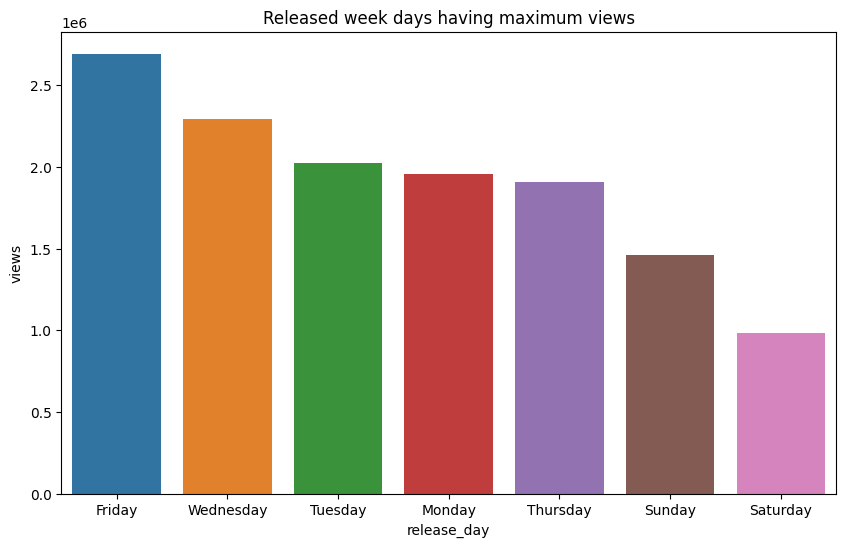

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

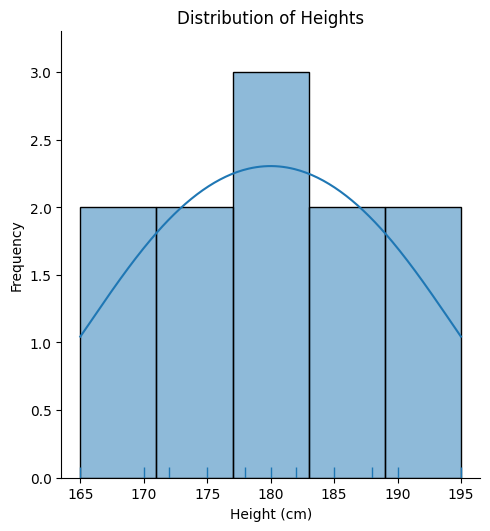

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace this with your actual dataset)
heights_data = [165, 170, 172, 175, 178, 180, 182, 185, 188, 190, 195]

# Create a displot
sns.displot(heights_data, kde=True, rug=True)

# Set plot title and labels
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Most frequent release months')

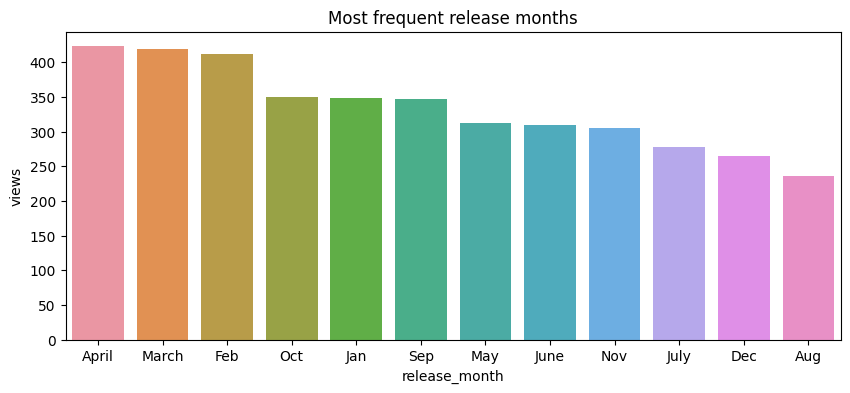

In [ ]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)


#checking months having maximum release
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
# checking the months having maximum release
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

<Axes: title={'center': 'Released months having maximum average views'}, xlabel='release_month', ylabel='views'>

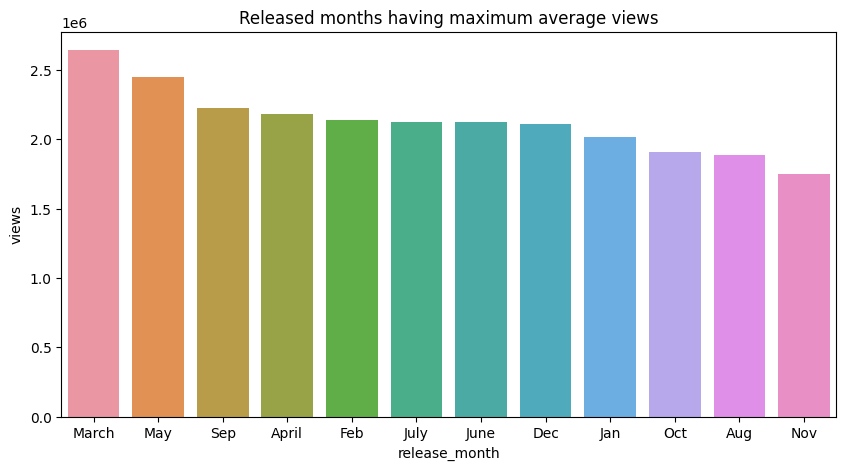

In [ ]:


#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

Text(0.5, 1.0, 'Most frequent release years')

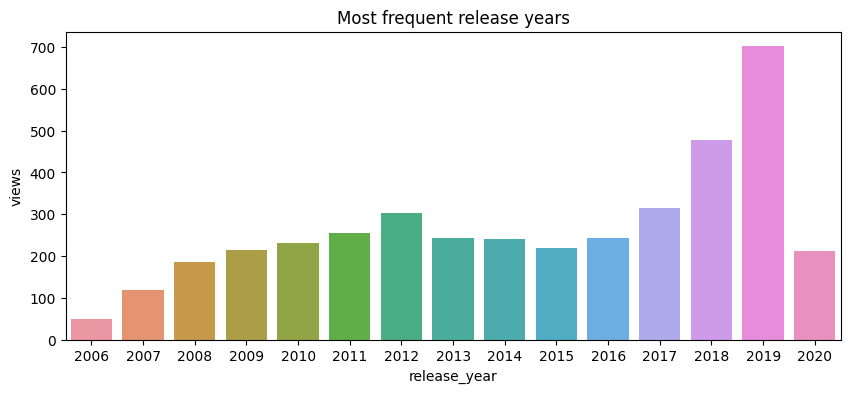

In [ ]:
#checking years having maximum release
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
#Plotting the years having maximum release
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

<Axes: title={'center': 'Released years having maximum average views'}, xlabel='release_year', ylabel='views'>

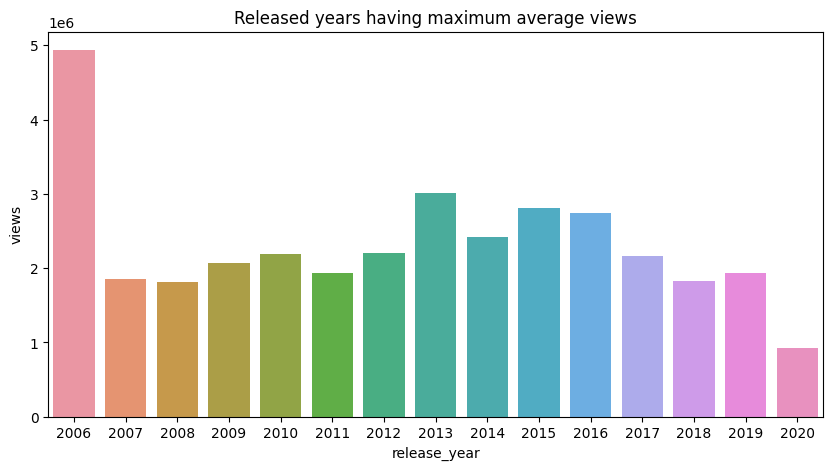

In [ ]:
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

<Axes: xlabel='views', ylabel='Density'>

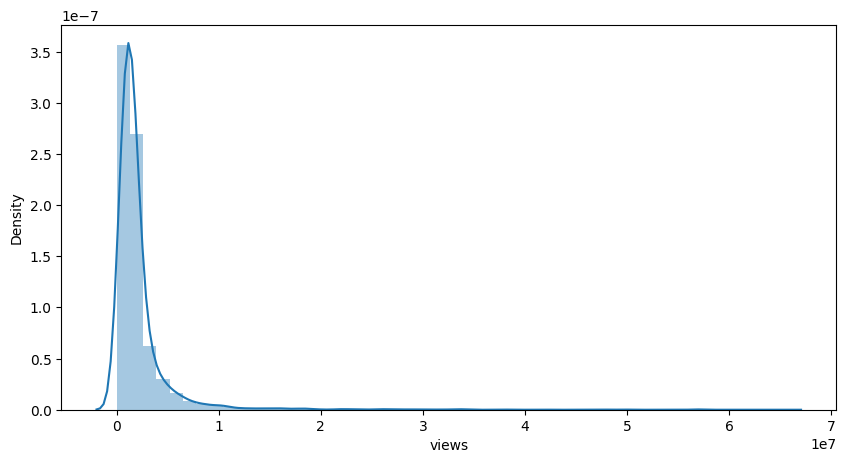

In [ ]:
#plotting the distplot of tareget variable
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

<Axes: xlabel='duration', ylabel='Density'>

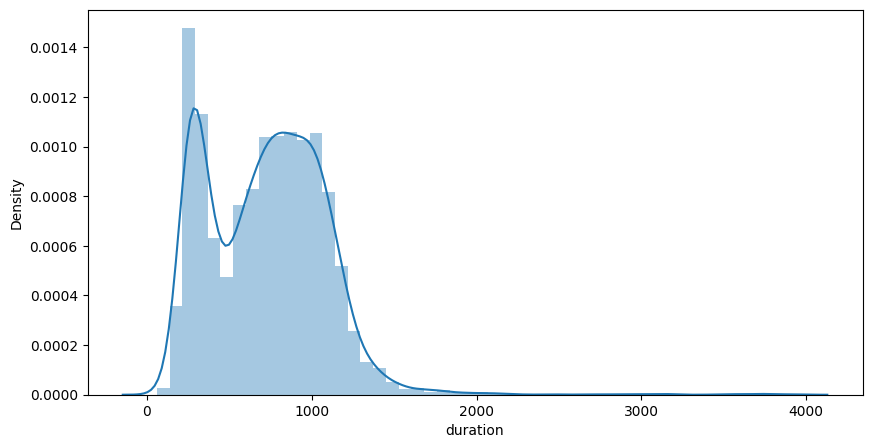

In [ ]:
#plotting the distplot of duration
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
4.1 Feature Engineering on Speaker_1 column
We are going to use target encoding for speaker_1 column as it has high cardinality number around 3000.

Target encoding is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model. ... This can help improve machine learning accuracy since algorithms tend to have a hard time dealing with high cardinality columns.

In [ ]:
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

<Axes: xlabel='speaker_1_avg_views', ylabel='Density'>

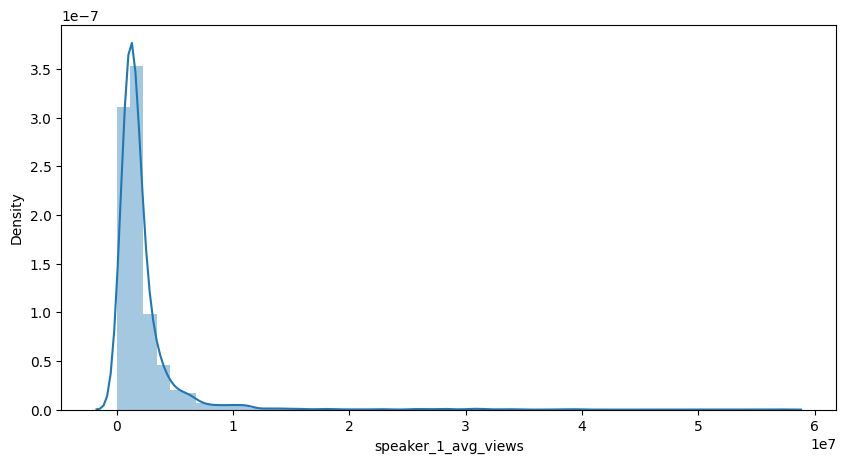

In [ ]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])


The dataset has 459 unique event category but lots of these names are quite similar and can be categorised together.

In [ ]:
#finding the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

459

In [ ]:
#applying target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

Now, we have done target encoding on categorical values in the event column.

We can further use this feature directly while modelling.

We can drop the event column now.

<Axes: xlabel='event_wise_avg_views', ylabel='Density'>

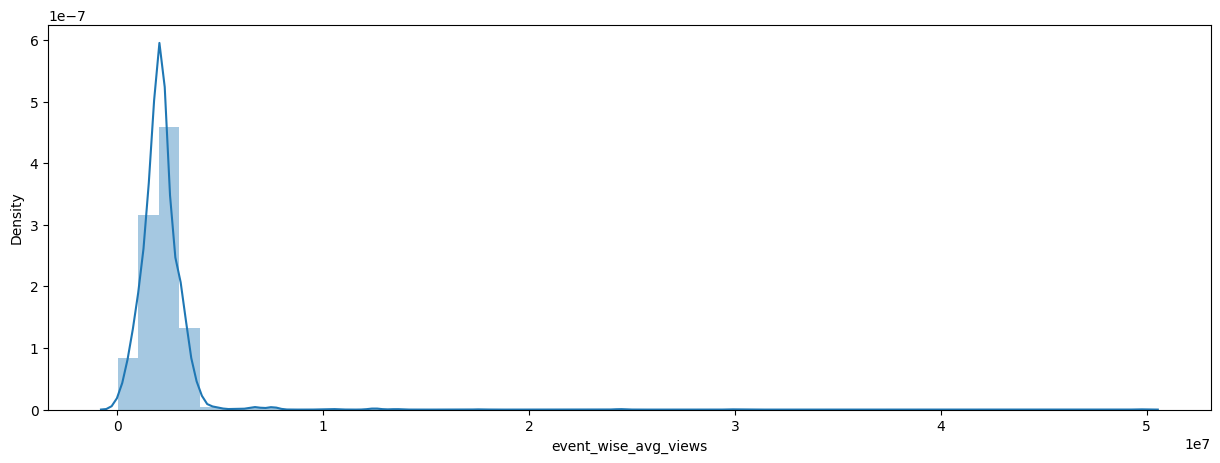

In [ ]:

#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

In [ ]:

#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [ ]:
len(df['available_lang'][10])

26

Let's add a new feature which contain the count of total no of language for a particular video.

In [ ]:

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [ ]:


#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

<Axes: xlabel='num_of_lang', ylabel='Density'>

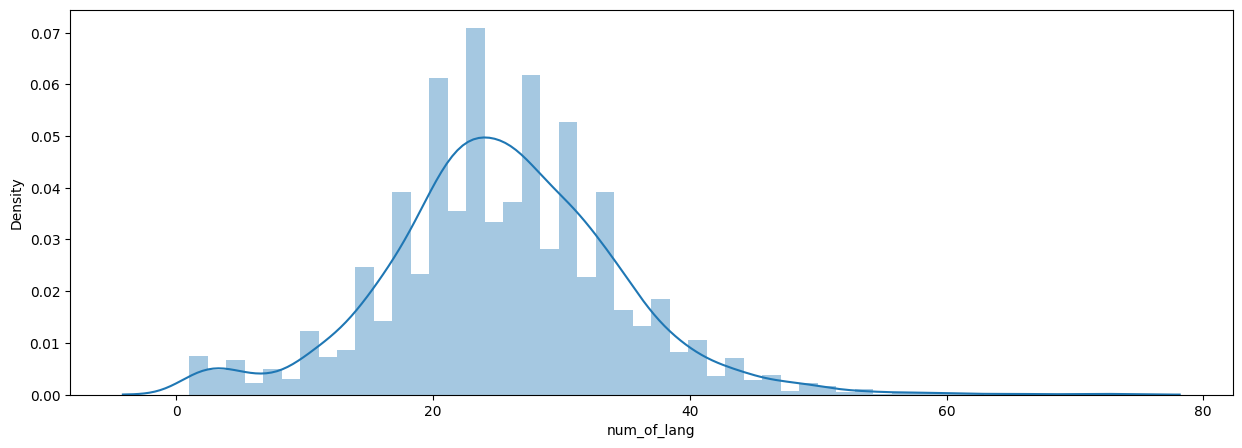

In [ ]:

sns.distplot(df['num_of_lang'])


In [ ]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [ ]:

df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)


In [ ]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)


<Axes: xlabel='num_of_tags', ylabel='Density'>

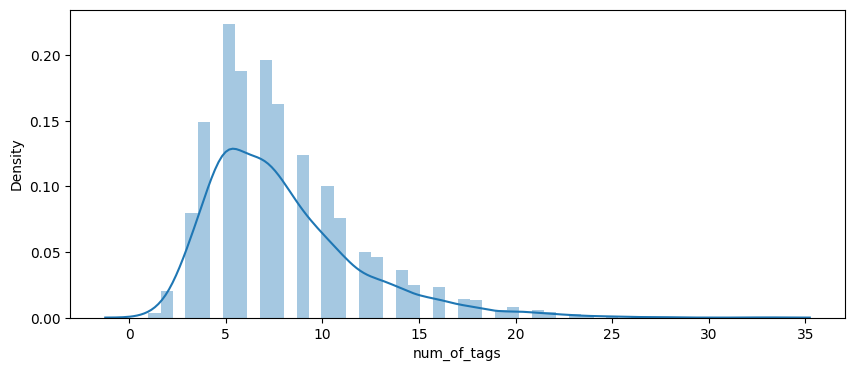

In [ ]:

plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])



In [ ]:
df['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [ ]:

#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

len(unique_topics)


457

In [ ]:

#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count


In [ ]:

#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]

  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values


<Axes: xlabel='topics_wise_avg_views', ylabel='Density'>

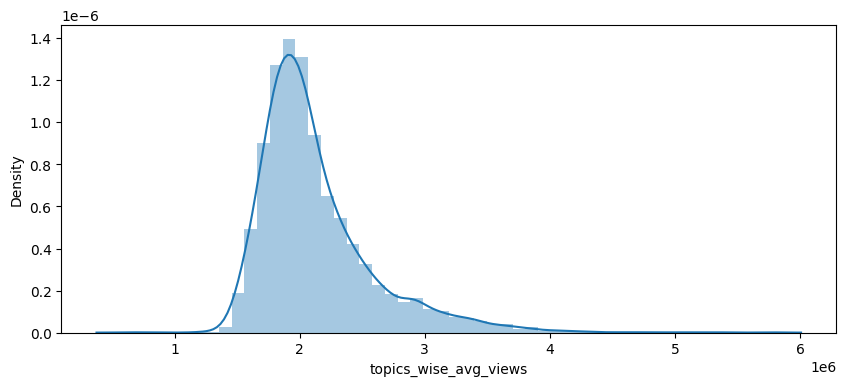

In [ ]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])


4.5 Feature Engineering on published_date column.
We can add a new column called video_age which is the difference of current year and published year.



In [ ]:

df['video_age']=2021-df['release_year']


In [ ]:

df=df.drop(columns='published_date')


In [ ]:

#applying eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [ ]:

df['related_talks'][0]


{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 54715: 'How we can turn the tide on climate',
 29968: 'The most important thing you can do to fight climate change: talk about it',
 2339: "Climate change is happening. Here's how we adapt"}


Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.
We can take mean of the views of those six related talks for each video and can add as a new feature called related_views.

In [ ]:

#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

<Axes: xlabel='related_views', ylabel='Density'>

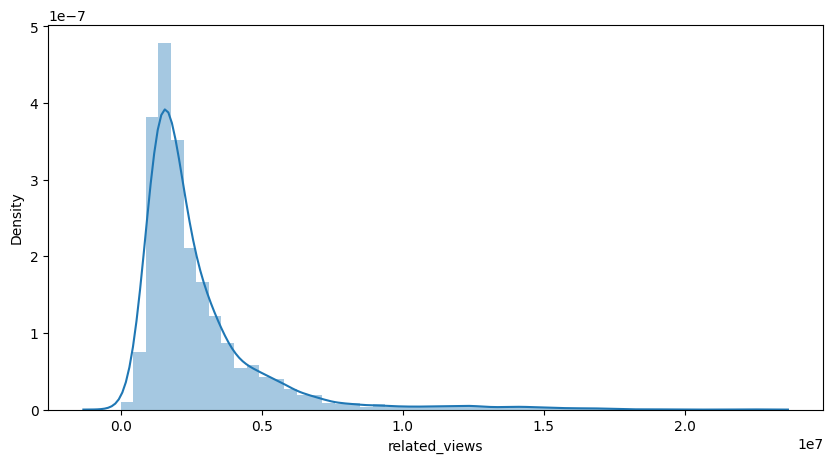

In [ ]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])


In [ ]:
#creating a copy of the dataframe
gf=df.copy()

In [ ]:
df=gf.copy()


5 Data cleaning


In [ ]:
df.describe()

,talk_id,views,comments,duration,release_year,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views
count,4005.000000,4.005000e+03,3350.000000,4005.000000,4005.000000,4.005000e+03,4.005000e+03,4005.000000,4005.000000,4.005000e+03,4005.000000,4.005000e+03
mean,12432.538327,2.148006e+06,161.997015,724.011236,2014.596754,2.148006e+06,2.148006e+06,25.304120,7.915106,2.126841e+06,6.403246,2.728345e+06
std,17447.576262,3.451226e+06,268.838922,361.775462,3.991930,3.053877e+06,1.427461e+06,9.038567,3.904362,4.590286e+05,3.991930,2.311354e+06
min,1.000000,0.000000e+00,0.000000,60.000000,2006.000000,0.000000e+00,1.570000e+04,1.000000,1.000000,6.382040e+05,1.000000,0.000000e+00
25%,1252.000000,8.820690e+05,38.000000,393.000000,2011.000000,9.406640e+05,1.614620e+06,20.000000,5.000000,1.830809e+06,3.000000,1.419894e+06
50%,2333.000000,1.375508e+06,89.000000,738.000000,2015.000000,1.432522e+06,2.059996e+06,25.000000,7.000000,2.011484e+06,6.000000,1.988653e+06
75%,23777.000000,2.133110e+06,188.000000,974.000000,2018.000000,2.216224e+06,2.480349e+06,31.000000,10.000000,2.292261e+06,10.000000,3.140970e+06
max,62794.000000,6.505195e+07,6449.000000,3922.000000,2020.000000,5.707427e+07,4.973058e+07,73.000000,33.000000,5.746401e+06,15.000000,2.233165e+07


In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                 261
description                0
duration                  21
event                      0
event_wise_avg_views     156
native_lang                0
num_of_lang              121
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views            300
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

We have outliers in few columns which needs to be treated well.
I am replacing the outliers with the extreme values.

In [ ]:
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [ ]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                   0
description                0
duration                   0
event                      0
event_wise_avg_views       0
native_lang                0
num_of_lang                0
num_of_tags                0
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views        0
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views      0
transcript                 0
video_age                  0
views                      0
dtype: int64

In [ ]:
df.columns


Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'comments', 'duration', 'topics', 'related_talks', 'description',
       'transcript', 'occupation', 'release_day', 'release_month',
       'release_year', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_lang', 'num_of_tags', 'topics_wise_avg_views', 'video_age',
       'related_views'],
      dtype='object')

In [ ]:
df.drop(columns=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'topics', 'related_talks', 'transcript', 'description', 'occupation', 'release_year'], inplace=True)


In [ ]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [ ]:

#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape


(4005, 499)

In [ ]:

X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,event_Arbejdsglaede Live,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,43.0,9.0,1750846.0,15,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,11.0,2290338.0,15,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0


Now, we have around 28 features after one hot encoding.
Applying proper feature selection is must here to get rid of unimportant features.
5.2 Let's treat nan values of numerical columns using KNNImputer

In [ ]:
#checking for null values
X[['duration','comments']].isna().sum()

duration      0
comments    655
dtype: int64

Here, we have around 655 NaN values in comments column.
Let's treat it using KNNImputer.

In [ ]:

#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [ ]:
#let's check for nan values again
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

In [ ]:
X.head(2)

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,num_of_tags,topics_wise_avg_views,video_age,related_views,event_Arbejdsglaede Live,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,43.0,9.0,1750846.0,15,1659584.0,0,...,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,11.0,2290338.0,15,1573950.0,0,...,0,0,0,0,1,0,0,0,0,0


Let's make a boxplot of duration column.

<Axes: xlabel='duration'>

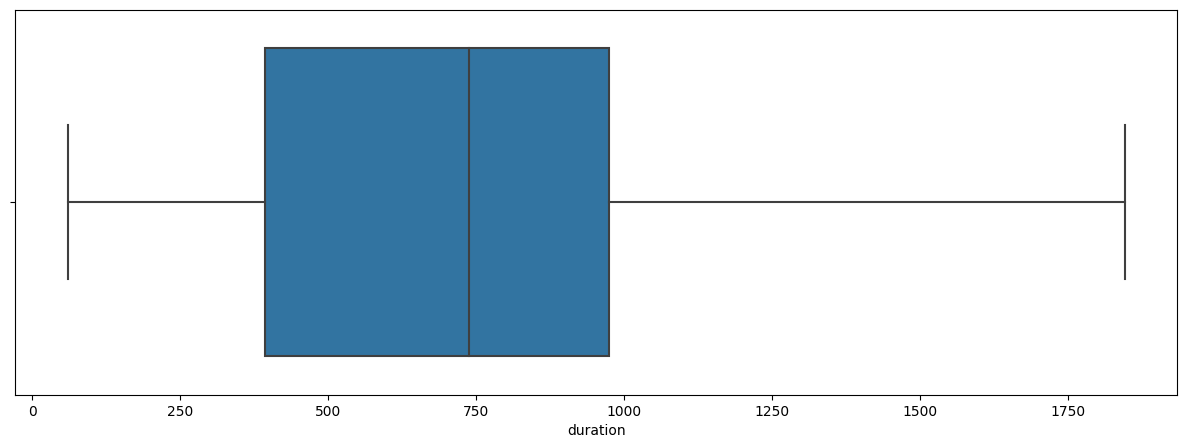

In [ ]:
sns.boxplot(x=X['duration'])

Let's make a boxplot of comments column

<Axes: xlabel='comments'>

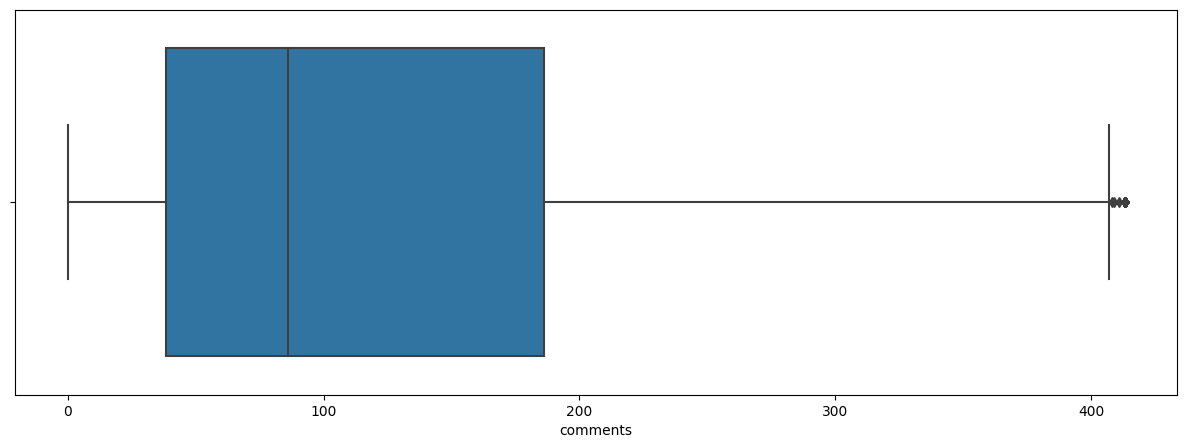

In [ ]:

sns.boxplot(x=X['comments'])

6. Feature Selection

In [ ]:
#printing the shape of features
X.shape

(4005, 499)

From here we can see that a lot more work on feature selection is required.

Let's do feature selection from these 28 dependent variables and select the best set of features.

In [ ]:

#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.43117088e+02, 2.22138034e+00, 8.21343686e+02, 7.26280093e-01,
        6.34241154e+02, 2.60825437e-01, 2.48664634e+00, 4.31363177e+00,
        2.32116679e-02, 7.34863182e-02, 5.20046634e+00, 5.13992392e-01,
        1.89881019e+00, 1.44308201e+00, 1.27499326e-01, 2.09521961e-01,
        2.58205510e-01, 3.29452501e-01, 1.53232488e-02, 7.30459676e-02,
        1.58140311e+01, 1.69021455e+00, 1.08791711e+00, 1.72967408e+01,
        8.10199896e-02, 2.34561627e-01, 3.78702198e-02, 2.06219244e+00,
        2.62891688e+00, 7.34586843e-03, 1.16219824e+00, 5.36698343e-03,
        1.19820779e-01, 9.87930817e-01, 5.49321029e-01, 1.37960928e-03,
        1.69277746e-02, 8.41890329e-02, 1.64324501e+00, 1.33653179e-01,
        6.67713339e-02, 1.45704085e-02, 7.77122530e-03, 2.62672352e+00,
        1.36695913e+00, 1.27067215e-03, 1.18201252e+01, 1.93631801e+00,
        6.75174220e+00, 1.44570805e+00, 8.24947107e+00, 2.119122

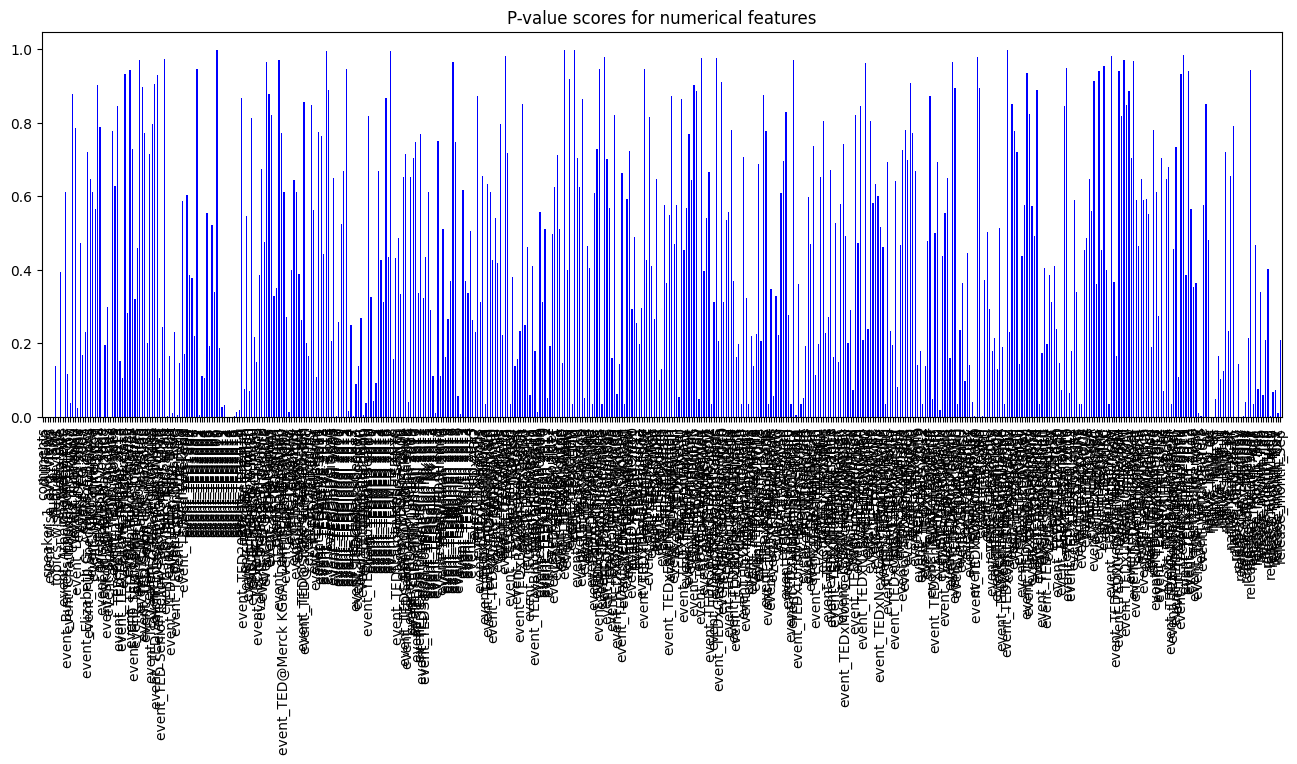

In [ ]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

From here using p value analysis we can drop those features having high p values.

In [ ]:

X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_lang', 'num_of_tags', 'topics_wise_avg_views', 'video_age',
       'related_views', 'event_Arbejdsglaede Live',
       ...
       'release_month_Dec', 'release_month_Feb', 'release_month_Jan',
       'release_month_July', 'release_month_June', 'release_month_March',
       'release_month_May', 'release_month_Nov', 'release_month_Oct',
       'release_month_Sep'],
      dtype='object', length=499)

In [ ]:

#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags','event_wise_avg_views',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']
len(ll)

9

In [ ]:
#let's take the important features
X=X[ll]

Plotting the correlation matrix.

<Axes: >

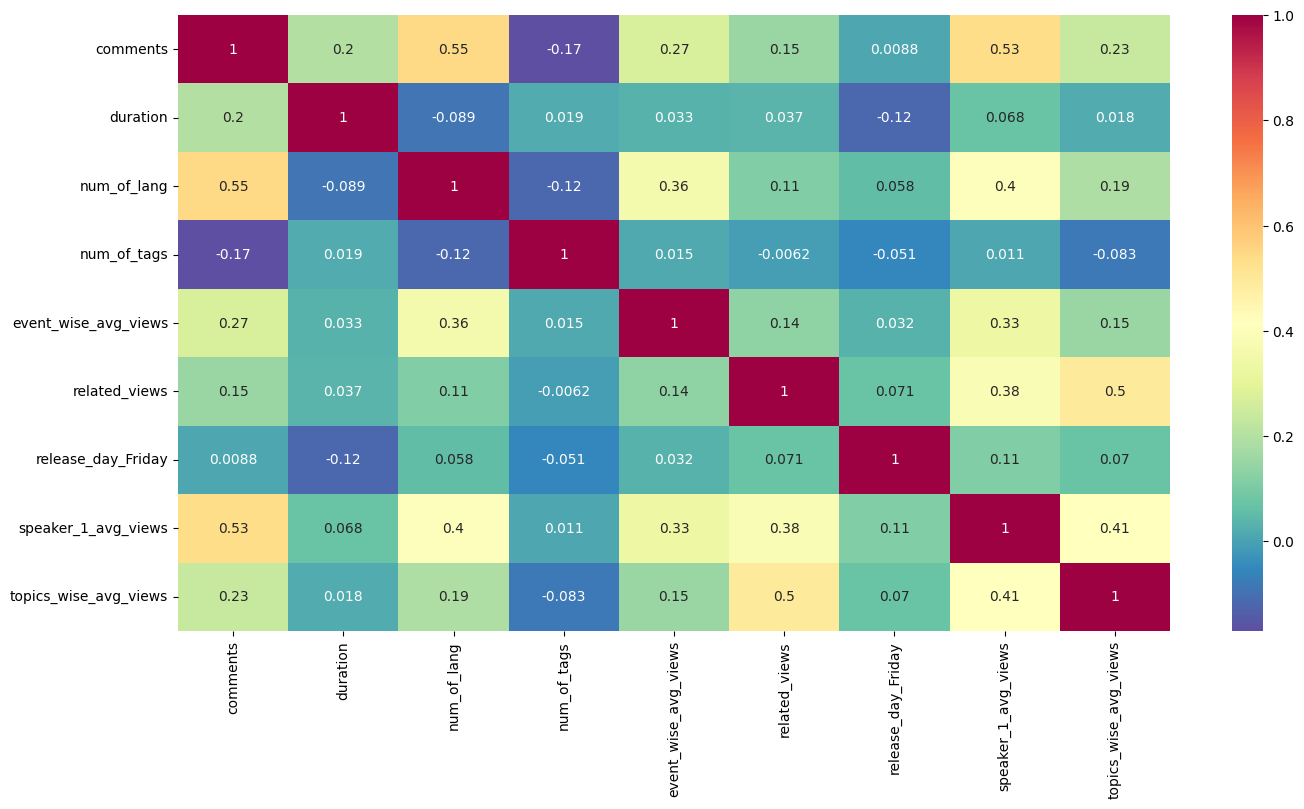

In [ ]:

# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

Applying train test split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

7. Fitting the regression models and HyperParameter Tuning
    7.1 Let's apply linear regression model.

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:

#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 220137562384.13272
RMSE on test is 469188.19506050315
Training MAE: 271274.39
Test MAE: 264440.61


Despite of the fact that our features are not following linear assumption which we have checked earlier, this model is giving a satisfactory score.
7.2 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# applying RandomForestRegressor on default parameters
rf = RandomForestRegressor()  # No need to specify criterion for default 'squared_error'
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 83854.95
Test MAE: 223889.84
Target mean: 1661354.12
Target std: 1102595.71


It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.
Defining Parameter Dict for Hyperparameter Tuning

In [ ]:

#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


1. Hyperparameter Tuning using Randomized Search CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

# Define the hyperparameter grid for random search
param_dict = {
    'n_estimators': [10, 50, 100, 200],  # Example values, modify as needed
    'max_depth': [None, 10, 20, 30],  # Example values, modify as needed
    'min_samples_split': [2, 5, 10],  # Example values, modify as needed
    'min_samples_leaf': [1, 2, 4]  # Example values, modify as needed
    # Add more hyperparameters as needed
}

# RandomizedSearch
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dict, n_iter=10, verbose=0, cv=5)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [ ]:

#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_


In [ ]:
rf_optimal_model

RandomForestRegressor(max_depth=30, min_samples_leaf=4)

In [ ]:

#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 144976.49
Test MAE: 217495.28


In [ ]:

# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9250006231623539
For test set the R_Squared for RFforest is 0.8304891980230926 and adjusted R_Squared is 0.8301073213728317


Let's plot all the scores of rf_optimal_model together.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded or defined as X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
models = [
    ['RandomForest', RandomForestRegressor(random_state=42)]
]

# Let's run the models and store the results in a dataframe
model_data = []
for model_name, current_model in models:
    current_model_data = {}
    current_model_data["Model_Name"] = model_name
    current_model.fit(X_train, y_train)

    current_model_data["MAE_train"] = metrics.mean_absolute_error(y_train, current_model.predict(X_train))
    current_model_data["MAE_test"] = metrics.mean_absolute_error(y_test, current_model.predict(X_test))

    current_model_data["R2_Score_train"] = r2_score(y_train, current_model.predict(X_train))
    current_model_data["R2_Score_test"] = r2_score(y_test, current_model.predict(X_test))

    current_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train, current_model.predict(X_train)))
    current_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test, current_model.predict(X_test)))

    model_data.append(current_model_data)

results_df_rf = pd.DataFrame(model_data)

# Printing the results_df_rf
print(results_df_rf)

     Model_Name     MAE_train      MAE_test  R2_Score_train  R2_Score_test  \
0  RandomForest  84851.250949  213248.62161        0.976178       0.829314   

   RMSE_Score_train  RMSE_Score_test  
0     170546.852977    451222.160621  


Let's plot the feature importance score w.r.t. RF model

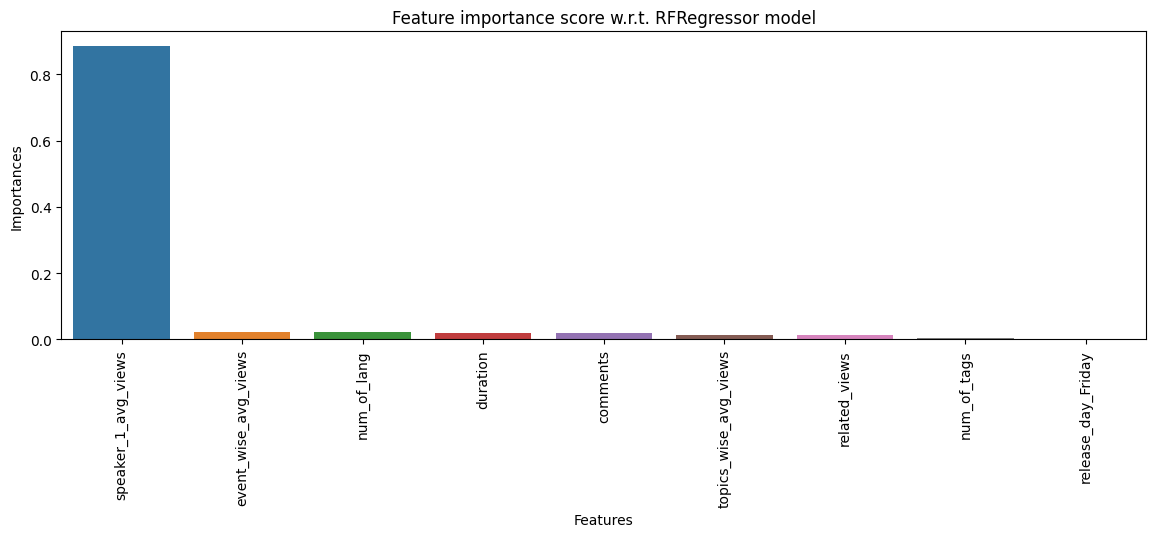

In [ ]:

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': rf_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

speaker_avg_views is the most important feature in RandomForestregressor followed by event_wise_avg_views.
7.3 Applying XGboost regressor model

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, min_samp

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=50, n_jobs=None, ...)

In [ ]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9432186593859458
For test set the R_Squared for XGBoost is 0.8375950696461363 and adjusted R_Squared is 0.837229201217304


In [ ]:

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 136089.78
Test MAE: 212658.12


Let's plot all the scores of xgb_optimal_model together.

In [ ]:

#Defining the model
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,170773.381876,211020.315187,0.910453,0.847572,330661.500729,426406.411197


Let's plot the feature importance score w.r.t. XGBregressor model

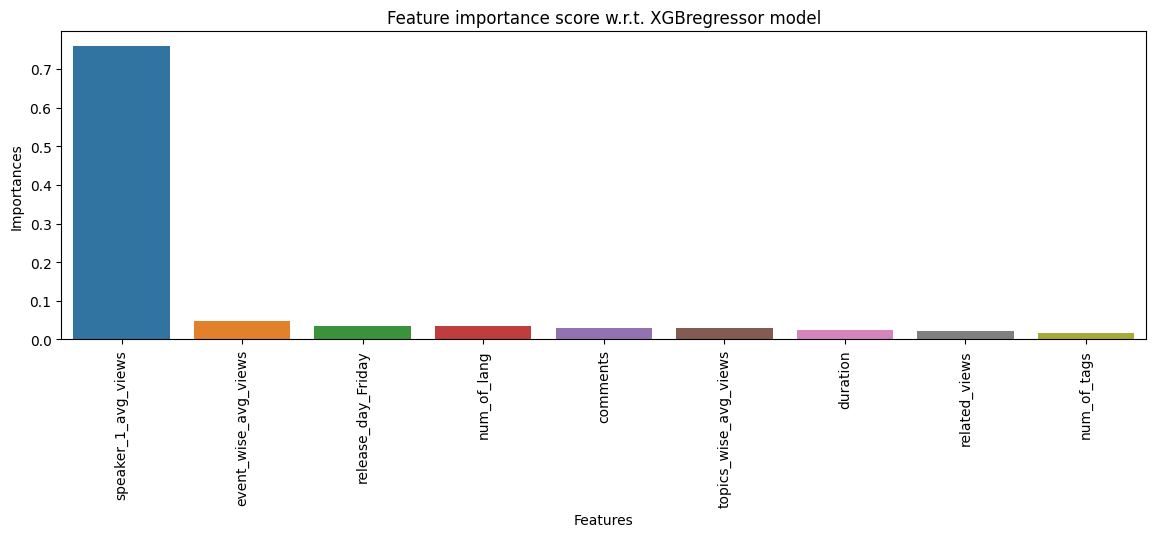

In [ ]:

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': xgb_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

speaker1_avg_views is the most important feature in XGBregressor model followed by event_wise_avg_views.
7.4 Let's try ExtraTreesRegressor.

In [ ]:
et = ExtraTreesRegressor(max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 104223.86
Test MAE: 203015.80


Hyperparameter Tuning using Randomized Search CV

In [ ]:
#Extra Trees Regressor paramdict
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Extratrees regressor
et_model = ExtraTreesRegressor()

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=8, min_

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 222455.27
Test MAE: 208199.54


In [ ]:
# make predictions for test data
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8260258275765621
For test the R_Squared for ExtraTreesRegressor is 0.8324227161373849 and adjusted R_Squared is 0.8320451953477069


Let's plot all the scores of et_optimal_model together.

In [ ]:
#Defining the model
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,ExtraTreeRegressor :,238066.69112,221343.231839,0.823079,0.830855,464781.375623,449181.016346


Let's plot the feature importance score w.r.t. ExtraTreesRegressor model

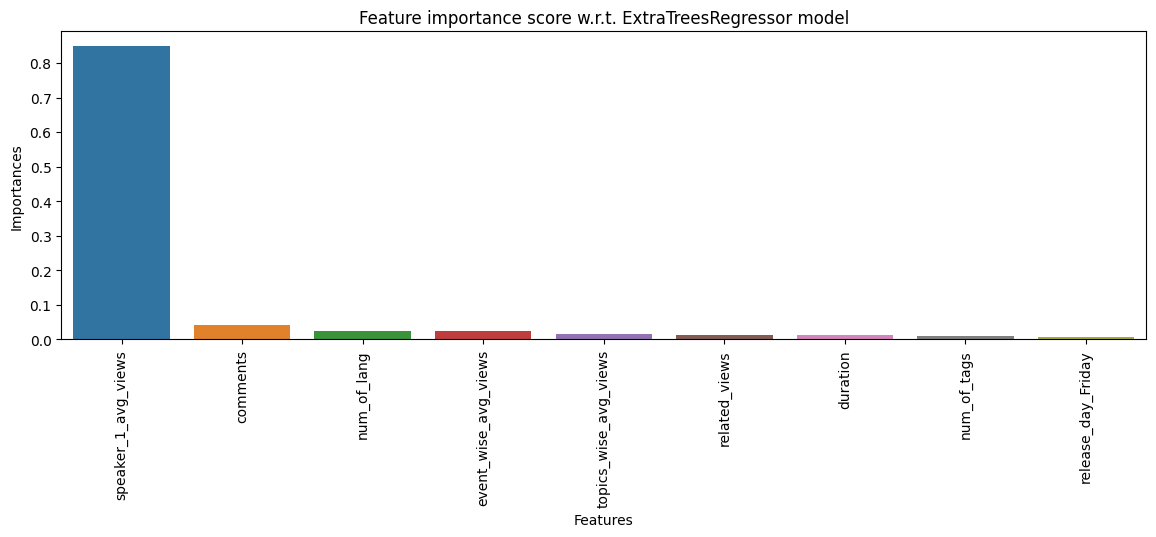

In [ ]:

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': et.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

speaker1_avg_views is the most important feature in RandomForestregressor followed by comments.
In all the models speaker_1_avg_views is impacting the much.
8. Comparison of different regressor Models
The ML regressor models that we have used are :
1.Lasso Regressor
2.Ridge Regressor
3.KNearestNeighbors Regressor
4.Random Forest Regressor
5.Extra Tree Regressor
6.Gradient Boosting Regressor
7.XGB Regressor
Let's try all these models together and store the scores in a new dataframe.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb

# Defining all these models
models = [
    ['Lasso: ', Lasso()],
    ['Ridge: ', Ridge()],
    ['KNeighborsRegressor: ', neighbors.KNeighborsRegressor()],
    ['RandomForest: ', RandomForestRegressor(max_depth=6, min_samples_leaf=30, min_samples_split=80, n_estimators=150, random_state=42)],
    ['ExtraTreeRegressor: ', ExtraTreesRegressor(max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=50)],
    ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
    ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bytree=1, gamma=0, importance_type='gain', learning_rate=0.1, max_depth=4, min_samples_leaf=40, min_samples_split=150, n_estimators=80)]
]

In [ ]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [ ]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso:,270888.562804,253439.801248,0.814551,0.827005,475851.738473,454264.384834
1,Ridge:,270884.397668,253433.192455,0.814551,0.827007,475851.740916,454262.429677
2,KNeighborsRegressor:,233154.288140,275461.063670,0.854843,0.788382,420996.499873,502421.116144
3,RandomForest:,214937.651891,208316.151351,0.836680,0.833142,446558.739184,446134.442067
4,ExtraTreeRegressor:,236592.006235,223331.447860,0.824581,0.831500,462803.540139,448324.037372
5,GradientBoostingRegressor:,191770.046020,219846.579999,0.889358,0.841641,367552.901056,434623.595810
6,XGBRegressor:,170773.381876,211020.315187,0.910453,0.847572,330661.500729,426406.411197


9. Final selection of the model
We choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons:

RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.

MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.

The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.

In [ ]:
#let's print the scores of Random Forest Regressor model
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,84851.250949,213248.62161,0.976178,0.829314,170546.852977,451222.160621


In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


MAE for Random Forest is around 12% of target variable mean